In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
# Carga desde un archivo .csv sin indice
df = pd.read_csv('Mexico_HotelRoom.csv')
df = df.drop(columns = ["Unnamed: 0"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            125 non-null    int64  
 1   last_scraped                                  125 non-null    object 
 2   name                                          125 non-null    object 
 3   host_id                                       125 non-null    int64  
 4   host_name                                     125 non-null    object 
 5   host_since                                    125 non-null    object 
 6   host_response_time                            125 non-null    object 
 7   host_is_superhost                             125 non-null    object 
 8   host_identity_verified                        125 non-null    object 
 9   neighbourhood                                 125 non-null    obj

In [3]:
# Convertir la variable a tipo numerica 
encoder = LabelEncoder()
df['property_type'] = encoder.fit_transform(df['property_type'])

# Obtener el mapeo de categorías a números
categorias = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# Mostrar el diccionario con la correspondencia
categorias

{'Room in aparthotel': 0,
 'Room in bed and breakfast': 1,
 'Room in boutique hotel': 2,
 'Room in casa particular': 3,
 'Room in hostel': 4,
 'Room in hotel': 5,
 'Room in serviced apartment': 6}

<Axes: xlabel='property_type', ylabel='price'>

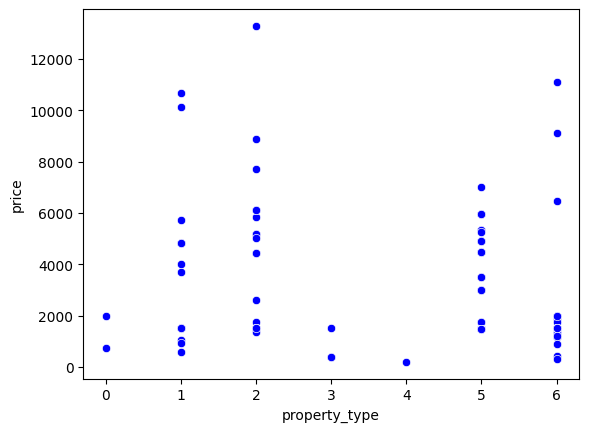

In [4]:
# Imprimimos el scatter plot entre la variable dependiente (price) e independiente (property_type) 
# para observar el comportamiento en su dipersión
from turtle import color

sns.scatterplot(x='property_type', y = 'price', color="blue", data = df)

In [5]:
# Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['property_type']]
Var_Dep = df ['price']

In [6]:
# Se define model como la función de regresión lineal 
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Verificamos la función relacioanada al modelo 
type(model)

sklearn.linear_model._base.LinearRegression

In [7]:
# Ajustamos el modelo con las variables antes declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

LinearRegression()

In [8]:
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-191.58063781]),
 'rank_': 1,
 'singular_': array([20.8038458]),
 'intercept_': 3937.556104361018}

**Modelo matematico**

In [9]:
# Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R 
model.score(Vars_Indep, Var_Dep)

0.020428986844203356

In [10]:
# Predeciumos los valores del precio del tipo de cuarto a partir de la variable "property_type" 
y_pred = model.predict( X = df [['property_type']])
y_pred

array([2788.07227753, 3554.39482875, 3554.39482875, 2788.07227753,
       2788.07227753, 2788.07227753, 2788.07227753, 2788.07227753,
       2788.07227753, 3745.97546656, 2788.07227753, 2788.07227753,
       3745.97546656, 2788.07227753, 2788.07227753, 3937.55610436,
       3554.39482875, 2788.07227753, 2788.07227753, 2788.07227753,
       3937.55610436, 2788.07227753, 2788.07227753, 2788.07227753,
       2788.07227753, 2788.07227753, 3554.39482875, 2788.07227753,
       2788.07227753, 2979.65291533, 2979.65291533, 2979.65291533,
       2979.65291533, 2979.65291533, 2979.65291533, 2979.65291533,
       2979.65291533, 2979.65291533, 2979.65291533, 2979.65291533,
       2979.65291533, 3745.97546656, 3554.39482875, 2788.07227753,
       3554.39482875, 2788.07227753, 2788.07227753, 2788.07227753,
       2788.07227753, 3554.39482875, 3745.97546656, 3554.39482875,
       3362.81419094, 3745.97546656, 2788.07227753, 2788.07227753,
       3745.97546656, 3745.97546656, 3745.97546656, 3745.97546

In [11]:
# Insertanos la columnna de predicciones en el dataframe
df.insert(0, 'Predicciones', y_pred)
df

,Predicciones,id,last_scraped,name,host_id,host_name,host_since,host_response_time,host_is_superhost,host_identity_verified,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2788.072278,281134,2024-09-26,COOL PENT HOUSE APARTMENT @CONDESA,196253,Fernando,2010-08-09,within an hour,t,t,...,4.71,5.00,5.00,5.00,5.00,4.86,8.0,4.0,1.0,0.0
1,3554.394829,1565220,2024-09-26,Descansa en la Suite de la Abuelita San Angel ...,2518152,Martha Laura,2012-06-01,within an hour,t,t,...,5.00,5.00,5.00,4.96,4.93,4.93,7.0,1.0,4.0,0.0
2,3554.394829,1736063,2024-09-26,"Cómodo Estudio del Botánico, San Angel CDMX",2518152,Martha Laura,2012-06-01,within an hour,t,t,...,4.84,4.97,4.89,4.93,4.96,4.86,7.0,1.0,4.0,0.0
3,2788.072278,571166,2024-09-26,MODERN/HIP FURNISHED APARTMENT ( S1 Condesa Haus),196253,Fernando,2010-08-09,within an hour,t,t,...,5.00,5.00,5.00,4.90,5.00,4.00,8.0,4.0,1.0,0.0
4,2788.072278,737328,2024-09-26,Business Suite BEIGE near Reforma,3850198,Hermann,2012-10-12,within an hour,f,t,...,4.88,4.84,5.00,5.00,4.84,4.80,11.0,7.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,2979.652915,1191430079828817253,2024-09-26,4 Modern Units Just Steps from the Downtown!,547380140,Aishat,2023-11-20,within an hour,f,f,...,4.88,4.86,4.92,4.93,4.93,4.81,22.0,0.0,0.0,0.0
121,2979.652915,1191430130484570539,2024-09-26,"4 Units with City View, Steps from Alameda Cen...",547380140,Aishat,2023-11-20,within an hour,f,f,...,4.88,4.86,4.92,4.93,4.93,4.81,22.0,0.0,0.0,0.0
122,2979.652915,1191430238014754309,2024-09-26,Rooftop Deck with Majestic Views! 4 Units,547380140,Aishat,2023-11-20,within an hour,f,f,...,4.88,4.86,4.92,4.93,4.93,4.81,22.0,0.0,0.0,0.0
123,2979.652915,1191430521084135024,2024-09-26,"Near Alameda Central, Bike Tours, Museum Treats",547380140,Aishat,2023-11-20,within an hour,f,f,...,4.88,4.86,4.92,4.93,4.93,4.81,22.0,0.0,0.0,0.0


<Axes: xlabel='property_type', ylabel='price'>

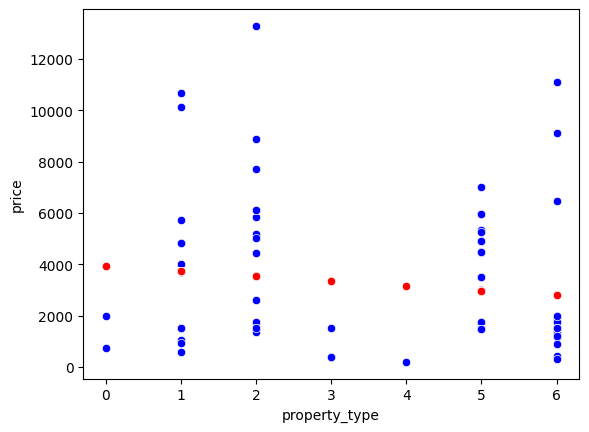

In [12]:
# Visualizamos la gráfica comparartiva entre el precio real y el precio predecido 

sns.scatterplot(x = 'property_type', y = 'price', color = "blue", data = df)
sns.scatterplot(x = 'property_type', y = 'Predicciones', color = "red", data = df)

In [13]:
# Corroboramos cual es el coeficiente de determianción de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.020428986844203356

In [14]:
# Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

0.14293000680124296

In [15]:
# Filtrar y eliminar columnas de tipo objeto
df = df.select_dtypes(exclude=['object'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 34 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Predicciones                                  125 non-null    float64
 1   id                                            125 non-null    int64  
 2   host_id                                       125 non-null    int64  
 3   latitude                                      125 non-null    float64
 4   longitude                                     125 non-null    float64
 5   property_type                                 125 non-null    int32  
 6   host_response_rate                            125 non-null    float64
 7   host_acceptance_rate                          125 non-null    float64
 8   host_listings_count                           125 non-null    float64
 9   host_total_listings_count                     125 non-null    flo

In [16]:
# Encontramos todas las correlaciones entre las variables 
Corr_Factors = df.corr()

# Encontramos el valor absoluto de todas las correlaciones entre las variables
Corr_Factors1 = abs(Corr_Factors)

Corr_Factors1

,Predicciones,id,host_id,latitude,longitude,property_type,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
Predicciones,1.000000,0.211799,0.298437,0.311031,0.077100,1.000000,0.318165,0.135136,0.179424,0.167252,...,0.034664,0.031163,0.134900,0.061455,0.015907,0.034607,0.275213,0.219679,0.385544,0.023118
id,0.211799,1.000000,0.888486,0.221483,0.416327,0.211799,0.243323,0.046231,0.271378,0.226916,...,0.176382,0.058559,0.171775,0.191352,0.093680,0.133920,0.389898,0.255748,0.388772,0.119164
host_id,0.298437,0.888486,1.000000,0.301864,0.369230,0.298437,0.221298,0.204208,0.135410,0.113987,...,0.009294,0.072532,0.000663,0.057596,0.008775,0.008296,0.267947,0.314866,0.468991,0.100308
latitude,0.311031,0.221483,0.301864,1.000000,0.375254,0.311031,0.176011,0.040982,0.240483,0.179175,...,0.137867,0.248829,0.209210,0.099964,0.225129,0.107151,0.359865,0.012865,0.379950,0.082623
longitude,0.077100,0.416327,0.369230,0.375254,1.000000,0.077100,0.064271,0.058523,0.138687,0.065424,...,0.208439,0.024726,0.117228,0.278791,0.014807,0.212801,0.261001,0.175726,0.127938,0.073200
property_type,1.000000,0.211799,0.298437,0.311031,0.077100,1.000000,0.318165,0.135136,0.179424,0.167252,...,0.034664,0.031163,0.134900,0.061455,0.015907,0.034607,0.275213,0.219679,0.385544,0.023118
host_response_rate,0.318165,0.243323,0.221298,0.176011,0.064271,0.318165,1.000000,0.149219,0.106904,0.128873,...,0.007600,0.018673,0.016020,0.017958,0.002983,0.000756,0.186625,0.073581,0.081755,0.004960
host_acceptance_rate,0.135136,0.046231,0.204208,0.040982,0.058523,0.135136,0.149219,1.000000,0.626813,0.643334,...,0.063786,0.026632,0.157469,0.013929,0.039066,0.012511,0.268996,0.023682,0.534940,0.268122
host_listings_count,0.179424,0.271378,0.135410,0.240483,0.138687,0.179424,0.106904,0.626813,1.000000,0.978718,...,0.002449,0.089701,0.017845,0.031397,0.115794,0.069952,0.735049,0.311274,0.355622,0.294233
host_total_listings_count,0.167252,0.226916,0.113987,0.179175,0.065424,0.167252,0.128873,0.643334,0.978718,1.000000,...,0.054180,0.081810,0.007732,0.054053,0.112383,0.124840,0.619842,0.293660,0.354852,0.286133


<Axes: >

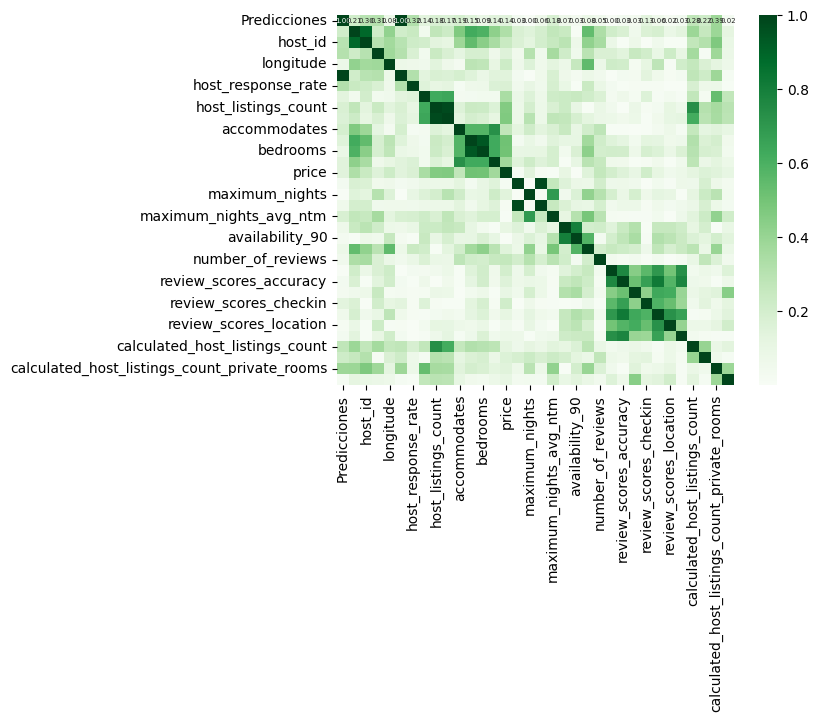

In [17]:
# Ajustamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap = 'Greens', annot = True, fmt = ".2f", annot_kws={"size": 5})

Heat_Map